In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold

In [2]:
np.random.seed(0)

In [3]:
dogs_whisker_length = np.random.normal(loc=5, scale=1, size=10)
dogs_ear_flappiness_index = np.random.normal(loc=8, scale=1, size=10)

In [4]:
cats_whisker_length = np.random.normal(loc=8, scale=1, size=10)
cats_ear_flappiness_index = np.random.normal(loc=5, scale=1, size=10)

In [5]:
dogs_data = np.vstack((dogs_whisker_length, dogs_ear_flappiness_index)).T
cats_data = np.vstack((cats_whisker_length, cats_ear_flappiness_index)).T
data = np.vstack((dogs_data, cats_data))
labels = np.hstack((np.zeros(len(dogs_data)), np.ones(len(cats_data))))

In [7]:
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

In [8]:
X_test

array([[6.76405235, 8.14404357],
       [7.81281615, 6.20237985],
       [6.54563433, 5.15634897],
       [5.40015721, 9.45427351],
       [4.89678115, 8.3130677 ],
       [4.02272212, 8.33367433]])

In [9]:
X_train

array([[ 8.6536186 ,  5.37816252],
       [ 7.2408932 ,  8.12167502],
       [ 9.53277921,  4.61267318],
       [ 8.04575852,  6.23029068],
       [ 7.25783498,  3.01920353],
       [ 5.97873798,  8.76103773],
       [ 5.4105985 ,  7.14590426],
       [ 9.46935877,  4.69769725],
       [ 6.86755799,  8.44386323],
       [ 8.8644362 ,  4.11221425],
       [ 4.84864279,  7.79484174],
       [ 5.44701018,  5.15494743],
       [10.26975462,  4.65208785],
       [ 5.95008842,  9.49407907]])

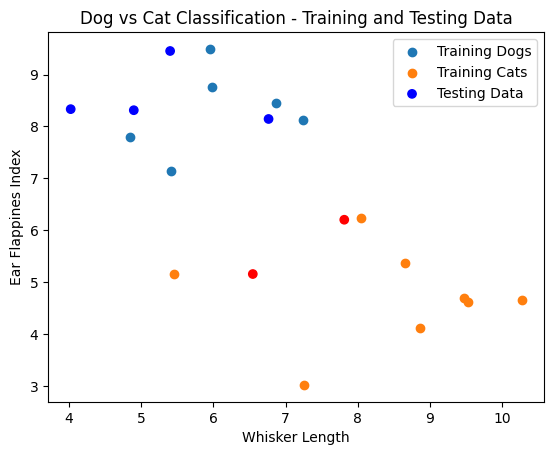

In [10]:
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label='Training Dogs')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label='Training Cats')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr', label='Testing Data')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappines Index')
plt.title('Dog vs Cat Classification - Training and Testing Data')
plt.legend()
plt.show()

In [ ]:
def random_linear_classifier(data_dogs, data_cats, k, d):
    best_error = float('inf')
    best_theta = None
    best_theta0 = None

    for _ in range(k):
        theta = np.random.normal(size=d)
        theta0 = np.random.normal()

        error = compute_error(data_dogs, data_cats, theta, theta0)

        if error<best_error:
            best_error = error
            best_theta = theta
            best_theta0 = theta0

        return best_theta, best_theta0
    
    def compute_error(data_dogs, data_cats, theta, theta0):
        error = 0
    for x_dog in data_dogs:
        if np.dot(theta, x_dog) + theta0 <= 0:
            error += 1
    for x_cat in data_cats:
        if np.dot(theta, x_cat) + theta0 > 0:
            error += 1
    return error

def cross_validate(data_dogs, data_cats, k_values, d, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    avg_errors = []

    for k in k_values:
        errors = []
        for train_index, val_index in kf.split(data_dogs):
            X_train_fold = np.vstack((data_dogs[train_index], data_cats[train_index]))
            y_train_fold = np.hstack((np.zeros(len(train_index)), np.ones(len(train_index))))
            X_val_fold = np.vstack((data_dogs[val_index], data_cats[val_index]))
            y_val_fold = np.hstack((np.zeros(len(val_index)), np.ones(len(val_index))))

            best_theta_fold, best_theta0_fold, error = random_linear_classifier(X_train_fold[y_train_fold == 0], X_train_fold[y_train_fold == 1], k, d)

            errors.append(compute_error(X_val_fold[y_val_fold == 0], X_val_fold[y_val_fold == 1], best_theta_fold, best_theta0_fold)) 
            avg_errors.append(np.mean(errors))

            best_k = k_values[np.argmin(avg_errors)]
            return best_k
        
        k_values = [1, 10, 50, 100, 200, 350]
        best_k = cross_validate(dogs_data, cats_data, k_values, d=2)
        print(f"Best value of k: {best_k}")

In [ ]:
k = best_k 
d = 2
best_theta_train, best_theta0_train, train_error = random_linear_classifier(X_train[y_train == 0], X_train[y_train == 1], k, d)